# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_nf = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(total_cities)
cities

602


['nikolskoye',
 'podgornoye',
 'port keats',
 'chokurdakh',
 'mount gambier',
 'cape town',
 'clyde river',
 'yellowknife',
 'carnarvon',
 'padang',
 'todos santos',
 'pochutla',
 'hobart',
 'vostok',
 'lagoa',
 'aliwal north',
 'cherskiy',
 'bronkhorstspruit',
 'ostersund',
 'punta arenas',
 'kodiak',
 'new norfolk',
 'demyansk',
 'ushuaia',
 'kapaa',
 'albany',
 'avera',
 'kruisfontein',
 'cienfuegos',
 'dingle',
 'wloclawek',
 'tiksi',
 'fortuna',
 'vaini',
 'souillac',
 'nizhneyansk',
 'kamenka',
 'norman wells',
 'bima',
 'port elizabeth',
 'klaksvik',
 'dikson',
 'chuy',
 'beyneu',
 'sakakah',
 'upernavik',
 'puerto ayora',
 'port alfred',
 'qaanaaq',
 'airai',
 'saldanha',
 'bredasdorp',
 'mataura',
 'pisco',
 'chapais',
 'mareeba',
 'severo-yeniseyskiy',
 'rikitea',
 'nanortalik',
 'naze',
 'hami',
 'xining',
 'olafsvik',
 'roald',
 'berlevag',
 'hermanus',
 'bluff',
 'alice springs',
 'taolanaro',
 'qasigiannguit',
 'wanning',
 'sao gabriel da cachoeira',
 'mahebourg',
 'mama'

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "weiser"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# cities = ["Paris", "London", "Oslo", "Beijing"]
# response = requests.get(query_url + city).json()

# print(json.dumps(response, indent = 4))
# print(response['coord']['lat'])
# print(response['main']['temp'])
# print(response['main']['temp_max'])
# print(response['main']['humidity'])
# print(response['clouds']['all'])
# print(response['wind']['speed'])
# print(response['sys']['country'])
# print(response['dt'])


# # set up lists to hold reponse info
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

print("Beginning Data Retrieval")
print("---------------------------")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processing Record {count} of {total_cities} | {city}")
    count +=1
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
        cities_nf.append(city)
#     temp.append(response['main']['temp'])

# print(cities_nf)

new_cities = list(set(cities) - set(cities_nf))

weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date    
}




Beginning Data Retrieval
---------------------------
Processing Record 1 of 602 | nikolskoye
Processing Record 2 of 602 | podgornoye
Processing Record 3 of 602 | port keats
Processing Record 4 of 602 | chokurdakh
Processing Record 5 of 602 | mount gambier
Processing Record 6 of 602 | cape town
Processing Record 7 of 602 | clyde river
Processing Record 8 of 602 | yellowknife
Processing Record 9 of 602 | carnarvon
Processing Record 10 of 602 | padang
Processing Record 11 of 602 | todos santos
Processing Record 12 of 602 | pochutla
Processing Record 13 of 602 | hobart
Processing Record 14 of 602 | vostok
Processing Record 15 of 602 | lagoa
Processing Record 16 of 602 | aliwal north
Processing Record 17 of 602 | cherskiy
Processing Record 18 of 602 | bronkhorstspruit
Processing Record 19 of 602 | ostersund
Processing Record 20 of 602 | punta arenas
Processing Record 21 of 602 | kodiak
Processing Record 22 of 602 | new norfolk
Processing Record 23 of 602 | demyansk
Processing Record 24 of 6

Processing Record 198 of 602 | abnub
Processing Record 199 of 602 | tura
Processing Record 200 of 602 | bogo
Processing Record 201 of 602 | coihaique
Processing Record 202 of 602 | egvekinot
Processing Record 203 of 602 | alyangula
Processing Record 204 of 602 | sola
Processing Record 205 of 602 | rimbey
Processing Record 206 of 602 | upata
Processing Record 207 of 602 | port blair
Processing Record 208 of 602 | balykshi
Processing Record 209 of 602 | kaitangata
Processing Record 210 of 602 | kedrovoye
Processing Record 211 of 602 | marcona
City not found. Skipping...
Processing Record 212 of 602 | bure
Processing Record 213 of 602 | wilmington
Processing Record 214 of 602 | anar darreh
City not found. Skipping...
Processing Record 215 of 602 | srednebelaya
Processing Record 216 of 602 | jurm
Processing Record 217 of 602 | castro
Processing Record 218 of 602 | hambantota
Processing Record 219 of 602 | grojec
Processing Record 220 of 602 | taoudenni
Processing Record 221 of 602 | waynes

Processing Record 394 of 602 | camopi
Processing Record 395 of 602 | te anau
Processing Record 396 of 602 | saint anthony
Processing Record 397 of 602 | assisi
Processing Record 398 of 602 | el dorado
Processing Record 399 of 602 | dalnerechensk
Processing Record 400 of 602 | sicuani
Processing Record 401 of 602 | mungwi
Processing Record 402 of 602 | havre-saint-pierre
Processing Record 403 of 602 | uyuni
Processing Record 404 of 602 | tsiroanomandidy
Processing Record 405 of 602 | hun
Processing Record 406 of 602 | nurota
Processing Record 407 of 602 | shelopugino
Processing Record 408 of 602 | conde
Processing Record 409 of 602 | tabiauea
City not found. Skipping...
Processing Record 410 of 602 | samarai
Processing Record 411 of 602 | cabo san lucas
Processing Record 412 of 602 | kashi
Processing Record 413 of 602 | xinmin
Processing Record 414 of 602 | cape elizabeth
City not found. Skipping...
Processing Record 415 of 602 | kuche
City not found. Skipping...
Processing Record 416 o

Processing Record 588 of 602 | skjervoy
Processing Record 589 of 602 | malakal
Processing Record 590 of 602 | garoua
Processing Record 591 of 602 | yaan
Processing Record 592 of 602 | yongchang
Processing Record 593 of 602 | manzhouli
Processing Record 594 of 602 | umm lajj
Processing Record 595 of 602 | omboue
Processing Record 596 of 602 | mayumba
Processing Record 597 of 602 | tromso
Processing Record 598 of 602 | zolotinka
City not found. Skipping...
Processing Record 599 of 602 | one hundred mile house
City not found. Skipping...
Processing Record 600 of 602 | birakan
Processing Record 601 of 602 | sevnica
Processing Record 602 of 602 | ghatanji


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# 

weather_data = pd.DataFrame(weather_dict)
# weather_data.to_csv(output_data_file)
weather_data.to_csv(output_data_file, index_label = "City_ID")
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port keats,59.7035,30.7861,-4.00,86,75,2.00,RU,1612064567
1,hurghada,51.7350,39.1496,2.00,93,90,9.00,RU,1612064963
2,coahuayana,-14.2500,129.5500,26.49,88,100,4.96,AU,1612064963
3,itarema,70.6333,147.9167,-34.56,85,0,3.86,RU,1612064589
4,arteaga,-37.8333,140.7667,21.00,49,40,3.60,AU,1612064963
...,...,...,...,...,...,...,...,...,...
557,vetrisoaia,-3.4320,10.6554,25.14,87,100,0.87,GA,1612064863
558,kuito,69.6496,18.9570,-5.56,92,20,0.83,NO,1612064896
559,ahipara,49.0167,131.7000,-22.28,80,2,2.87,RU,1612065014
560,gudari,46.0078,15.3156,1.11,93,90,5.14,SI,1612065014


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.220322,16.472515,8.665427,73.932384,53.934164,3.563238,1.612065e+09
std,32.988441,90.003080,18.046479,20.156581,40.536257,2.549823,1.075048e+02
min,-54.800000,-179.166700,-44.210000,15.000000,0.000000,0.020000,1.612064e+09
25%,-3.792875,-64.726375,-2.332500,63.000000,5.250000,1.540000,1.612065e+09
50%,25.609900,22.200700,14.570000,79.000000,69.500000,2.985000,1.612065e+09
75%,48.709100,95.174375,22.915000,89.000000,96.000000,4.920000,1.612065e+09
max,78.218600,179.316700,40.000000,100.000000,100.000000,15.850000,1.612065e+09


In [7]:
weather_data.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# weather_data_humidity = weather_data.loc("Humidity">'100')
weather_data_humidity = weather_data[(weather_data["Humidity"]> 100)].index
weather_data_humidity

Int64Index([], dtype='int64')

In [9]:
less_humid_cities = weather_data[(weather_data["Humidity"] <= 100)]
less_humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port keats,59.7035,30.7861,-4.00,86,75,2.00,RU,1612064567
1,hurghada,51.7350,39.1496,2.00,93,90,9.00,RU,1612064963
2,coahuayana,-14.2500,129.5500,26.49,88,100,4.96,AU,1612064963
3,itarema,70.6333,147.9167,-34.56,85,0,3.86,RU,1612064589
4,arteaga,-37.8333,140.7667,21.00,49,40,3.60,AU,1612064963
...,...,...,...,...,...,...,...,...,...
557,vetrisoaia,-3.4320,10.6554,25.14,87,100,0.87,GA,1612064863
558,kuito,69.6496,18.9570,-5.56,92,20,0.83,NO,1612064896
559,ahipara,49.0167,131.7000,-22.28,80,2,2.87,RU,1612065014
560,gudari,46.0078,15.3156,1.11,93,90,5.14,SI,1612065014


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_data_humid_cities_index = weather_data[(weather_data["Humidity"]> 100)].index
weather_data_humid_cities_index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(weather_data_humidity, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port keats,59.7035,30.7861,-4.00,86,75,2.00,RU,1612064567
1,hurghada,51.7350,39.1496,2.00,93,90,9.00,RU,1612064963
2,coahuayana,-14.2500,129.5500,26.49,88,100,4.96,AU,1612064963
3,itarema,70.6333,147.9167,-34.56,85,0,3.86,RU,1612064589
4,arteaga,-37.8333,140.7667,21.00,49,40,3.60,AU,1612064963
...,...,...,...,...,...,...,...,...,...
557,vetrisoaia,-3.4320,10.6554,25.14,87,100,0.87,GA,1612064863
558,kuito,69.6496,18.9570,-5.56,92,20,0.83,NO,1612064896
559,ahipara,49.0167,131.7000,-22.28,80,2,2.87,RU,1612065014
560,gudari,46.0078,15.3156,1.11,93,90,5.14,SI,1612065014


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

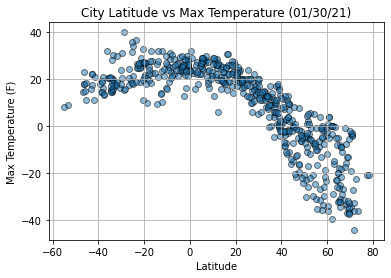

In [12]:
latitude = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]
# print(latitude)


plt.scatter(latitude, max_temp, edgecolor="black", linewidths=1, marker="o", alpha = 0.5, label = "Cities")
plt.title("City Latitude vs Max Temperature (%s)"%time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Latitude vs. Temperature Plot
plt.savefig("output_data/Lat_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

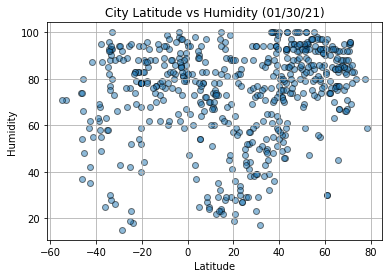

In [13]:
plt.scatter(latitude, humidity, edgecolor="black", linewidths=1, marker="o", alpha = 0.5, label = "Cities")
plt.title("City Latitude vs Humidity (%s)"%time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Latitude vs. Temperature Plot
plt.savefig("output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

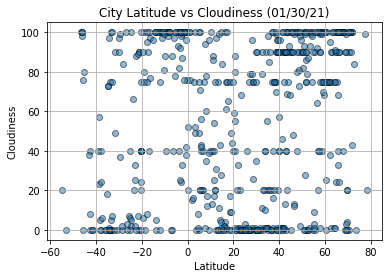

In [14]:
plt.scatter(latitude, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha = 0.5, label = "Cities")
plt.title("City Latitude vs Cloudiness (%s)"%time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Latitude vs. Temperature Plot
plt.savefig("output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

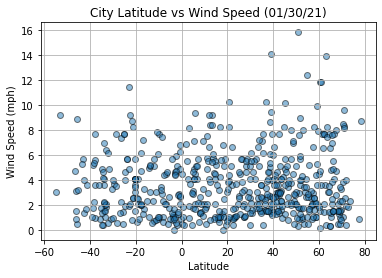

In [15]:
plt.scatter(latitude, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha = 0.5, label = "Cities")
plt.title("City Latitude vs Wind Speed (%s)"%time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the Latitude vs. Temperature Plot
plt.savefig("output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [16]:
#Linear Regression plot function
def linear_regression_plot(x_values, y_values, title,text_coordinates):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values*slope+intercept
    line_eq = "y= "+str(round(slope,2))+"x + " +str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize =20, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r value is: {rvalue**2}")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7604308740140018


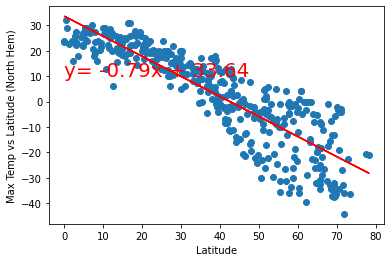

In [17]:
north_hemisphere = weather_data.loc[(weather_data["Lat"]>=0)]
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]
linear_regression_plot(x_values,y_values,'Max Temp vs Latitude (North Hem)', (0,10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.18181856106337466


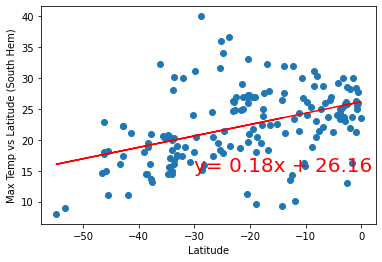

In [18]:
south_hemisphere = weather_data.loc[(weather_data["Lat"]<=0)]
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]
linear_regression_plot(x_values,y_values,'Max Temp vs Latitude (South Hem)', (-30,15))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.1398784375892333


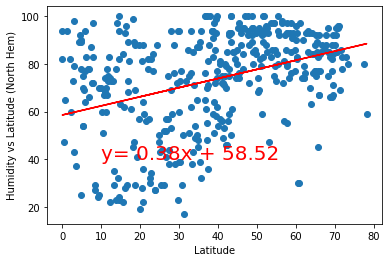

In [19]:
north_hemisphere = weather_data.loc[(weather_data["Lat"]>=0)]
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]
linear_regression_plot(x_values,y_values,'Humidity vs Latitude (North Hem)', (10,40))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.11940033721006577


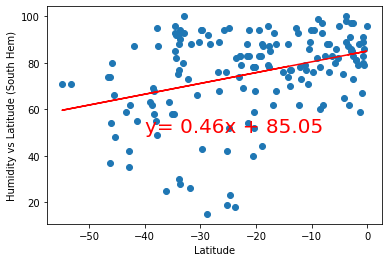

In [20]:
south_hemisphere = weather_data.loc[(weather_data["Lat"]<=0)]
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]
linear_regression_plot(x_values,y_values,'Humidity vs Latitude (South Hem)', (-40,50))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.10077897626792176


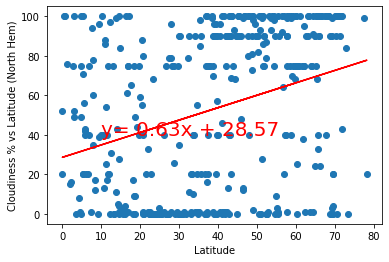

In [21]:
north_hemisphere = weather_data.loc[(weather_data["Lat"]>=0)]
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]
linear_regression_plot(x_values,y_values,'Cloudiness % vs Latitude (North Hem)', (10,40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.2062326974478719


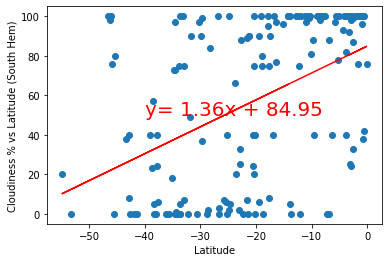

In [22]:
south_hemisphere = weather_data.loc[(weather_data["Lat"]<=0)]
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]
linear_regression_plot(x_values,y_values,'Cloudiness % vs Latitude (South Hem)', (-40,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.0012553203367721081


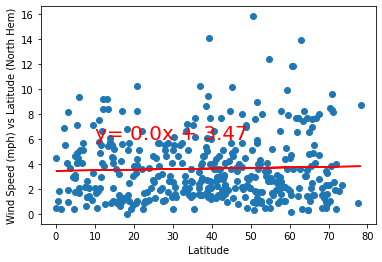

In [23]:
north_hemisphere = weather_data.loc[(weather_data["Lat"]>=0)]
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]
linear_regression_plot(x_values,y_values,'Wind Speed (mph) vs Latitude (North Hem)', (10,6))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.010525538861477706


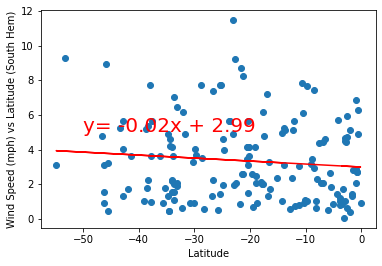

In [24]:
south_hemisphere = weather_data.loc[(weather_data["Lat"]<=0)]
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]
linear_regression_plot(x_values,y_values,'Wind Speed (mph) vs Latitude (South Hem)', (-50,5))